In [1]:
import pandas as pd
from ipyleaflet import Map, Marker, LayerGroup, Heatmap, LayersControl
from ipywidgets import HTML
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from scipy.stats import pearsonr

In [2]:
sensors = pd.read_csv('sensor_locations.csv')

Na początku użyłem biblioteki `ipyleaflets`, aby zobrazować lokalizacje czujników.

In [3]:
m = Map(center=(50.0614300, 19.9365800), zoom=11)
markers_layer = LayerGroup()
for index, sensor in sensors.iterrows():
    marker = Marker(location=(sensor['latitude'], sensor['longitude']))
    marker.popup = HTML(str(int(sensor['id'])))
    markers_layer.add_layer(marker)
    
m.add_layer(markers_layer)
display(m)

Map(center=[50.06143, 19.93658], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

Następnie wczytuję wszystkie dane do jednego dużego dataframe'u

In [4]:
filespath = ['data/{}'.format(file) for file in listdir('data')]

In [5]:
data = (pd.read_csv(file, engine='python') for file in filespath)

In [6]:
data = pd.concat(data)

In [7]:
data.sort_values('UTC time', inplace=True)

In [8]:
data.head()

UTC time  3_temperature  3_humidity  3_pressure  3_pm1  3_pm25  \
0  2017-01-01T00:00:00            NaN         NaN         NaN    NaN     NaN   
1  2017-01-01T01:00:00            NaN         NaN         NaN    NaN     NaN   
2  2017-01-01T02:00:00            NaN         NaN         NaN    NaN     NaN   
3  2017-01-01T03:00:00            NaN         NaN         NaN    NaN     NaN   
4  2017-01-01T04:00:00            NaN         NaN         NaN    NaN     NaN   

   3_pm10  140_temperature  140_humidity  140_pressure  ...  857_pressure  \
0     NaN              NaN           NaN           NaN  ...           NaN   
1     NaN              NaN           NaN           NaN  ...           NaN   
2     NaN              NaN           NaN           NaN  ...           NaN   
3     NaN              NaN           NaN           NaN  ...           NaN   
4     NaN              NaN           NaN           NaN  ...           NaN   

   857_pm1  857_pm25  857_pm10  895_temperature  895_humidity  895_pressure  \
0      NaN       NaN       NaN              NaN           NaN           NaN   
1      NaN       NaN       NaN              NaN           NaN           NaN   
2      NaN       NaN       NaN              NaN           NaN           NaN   
3      NaN       NaN       NaN              NaN           NaN           NaN   
4      NaN       NaN       NaN              NaN           NaN           NaN   

   895_pm1  895_pm25  895_pm10  
0      NaN       NaN       NaN  
1      NaN       NaN       NaN  
2      NaN       NaN       NaN  
3      NaN       NaN       NaN  
4      NaN       NaN       NaN  

[5 rows x 337 columns]

In [9]:
data['UTC time'] = pd.to_datetime(data['UTC time'])
data['month'] = data['UTC time'].dt.month
data['day'] = data['UTC time'].dt.day
data['hour'] = data['UTC time'].dt.hour

In [10]:
data.head()

UTC time  3_temperature  3_humidity  3_pressure  3_pm1  3_pm25  \
0 2017-01-01 00:00:00            NaN         NaN         NaN    NaN     NaN   
1 2017-01-01 01:00:00            NaN         NaN         NaN    NaN     NaN   
2 2017-01-01 02:00:00            NaN         NaN         NaN    NaN     NaN   
3 2017-01-01 03:00:00            NaN         NaN         NaN    NaN     NaN   
4 2017-01-01 04:00:00            NaN         NaN         NaN    NaN     NaN   

   3_pm10  140_temperature  140_humidity  140_pressure  ...  857_pm10  \
0     NaN              NaN           NaN           NaN  ...       NaN   
1     NaN              NaN           NaN           NaN  ...       NaN   
2     NaN              NaN           NaN           NaN  ...       NaN   
3     NaN              NaN           NaN           NaN  ...       NaN   
4     NaN              NaN           NaN           NaN  ...       NaN   

   895_temperature  895_humidity  895_pressure  895_pm1  895_pm25  895_pm10  \
0              NaN           NaN           NaN      NaN       NaN       NaN   
1              NaN           NaN           NaN      NaN       NaN       NaN   
2              NaN           NaN           NaN      NaN       NaN       NaN   
3              NaN           NaN           NaN      NaN       NaN       NaN   
4              NaN           NaN           NaN      NaN       NaN       NaN   

   month  day  hour  
0      1    1     0  
1      1    1     1  
2      1    1     2  
3      1    1     3  
4      1    1     4  

[5 rows x 340 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8593 entries, 0 to 576
Columns: 340 entries, UTC time to hour
dtypes: datetime64[ns](1), float64(336), int64(3)
memory usage: 22.4 MB


In [12]:
data.describe()

3_temperature  3_humidity     3_pressure        3_pm1       3_pm25  \
count     206.000000  206.000000    1178.000000  1235.000000  1235.000000   
mean       -5.131068   74.718447  101652.880306    70.830769    75.454251   
std         2.174645    9.939247    1020.704947    54.853035    66.299222   
min        -9.000000   38.000000   99160.000000     2.000000     0.000000   
25%        -7.000000   69.000000  100828.500000    33.000000    30.000000   
50%        -6.000000   77.000000  101726.000000    50.000000    52.000000   
75%        -4.000000   82.000000  102352.000000   101.000000   107.500000   
max         2.000000   92.000000  103619.000000   249.000000   314.000000   

            3_pm10  140_temperature  140_humidity   140_pressure      140_pm1  \
count  1235.000000      6506.000000   6506.000000    6683.000000  6631.000000   
mean    112.540891        11.464494     80.271288  101639.084842    26.537023   
std      89.265573         7.630920     17.167440     653.937345    19.283222   
min       3.000000        -6.000000     21.000000   98374.000000     0.000000   
25%      52.000000         6.000000     70.000000  101291.000000    13.000000   
50%      87.000000        11.000000     86.000000  101666.000000    23.000000   
75%     153.000000        17.000000     93.000000  102064.000000    34.000000   
max     440.000000        37.000000    115.000000  103155.000000   160.000000   

       ...     857_pm10  895_temperature  895_humidity   895_pressure  \
count  ...  2653.000000      5443.000000   5443.000000    6337.000000   
mean   ...    65.852997        10.660665     79.759691  101660.566672   
std    ...    56.194746         7.864320     19.397843     649.831280   
min    ...     0.000000        -7.000000     18.000000   98433.000000   
25%    ...    27.000000         4.000000     69.000000  101328.000000   
50%    ...    53.000000        10.000000     85.000000  101686.000000   
75%    ...    85.000000        16.000000     92.000000  102079.000000   
max    ...   373.000000        34.000000    134.000000  103199.000000   

           895_pm1     895_pm25     895_pm10        month          day  \
count  6337.000000  6337.000000  6337.000000  8593.000000  8593.000000   
mean     23.879754    23.922519    41.092788     6.419644    15.481555   
std      16.803287    20.897541    32.908029     3.395054     8.707080   
min       0.000000     0.000000     0.000000     1.000000     1.000000   
25%      13.000000    11.000000    18.000000     3.000000     8.000000   
50%      21.000000    19.000000    33.000000     6.000000    15.000000   
75%      29.000000    30.000000    54.000000     9.000000    23.000000   
max     132.000000   159.000000   239.000000    12.000000    31.000000   

              hour  
count  8593.000000  
mean     11.498662  
std       6.923298  
min       0.000000  
25%       5.000000  
50%      11.000000  
75%      17.000000  
max      23.000000  

[8 rows x 339 columns]

In [13]:
for sensor_id in sensors.id.unique():
    for feat in ['pm1', 'pm10', 'pm25', 'temperature', 'humidity', 'pressure']:
        colname = '{}_{}'.format(sensor_id, feat)
        data[colname] = data[colname].fillna(data[colname].median())

Stwierdziłem, że ciekawą wizualizacją może być heatmapa pokazująca średnie roczne zanieczyszczenie poszczególnymi frakcjami pyłów.

In [14]:
heatmap_data = sensors.loc[:].set_index('id')
for sensor_id in sensors.id.unique():
    for polutant in ['pm1', 'pm10', 'pm25']:
        heatmap_data.loc[sensor_id, '{}_mean'.format(polutant)] = data['{}_{}'.format(sensor_id, polutant)].mean()

In [15]:
center = (50.0614300, 19.9365800)
m = Map(center=center, zoom=11)
for polutant in heatmap_data.columns[-3:]:
    lats = heatmap_data['latitude'].values.tolist()
    longs = heatmap_data['longitude'].values.tolist()
    intensity = heatmap_data[polutant].values.tolist()
    locs = []
    for lat, lon, inten in zip(lats, longs, intensity):
        locs.append([lat, lon, inten])
    heatmap = Heatmap(locations=locs, radius=30, blur=30, name=polutant)
    m.add_layer(heatmap)

m.add_control(LayersControl())
display(m)

Map(center=[50.06143, 19.93658], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

Na powyższej mapie wyraźnie widać, że dwoma obszarami o największym zanieczyszczeniu powietrza jest obszar Grzegórzki-Podgórze oraz okolice Bronowic i Prądnika Białego. Dodatkowo okolice wyjazdu z Krakowa ul. Lipską możemy zauważyć wyższe stężenie pyłów z frakcji pm10

/home/marcin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/marcin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


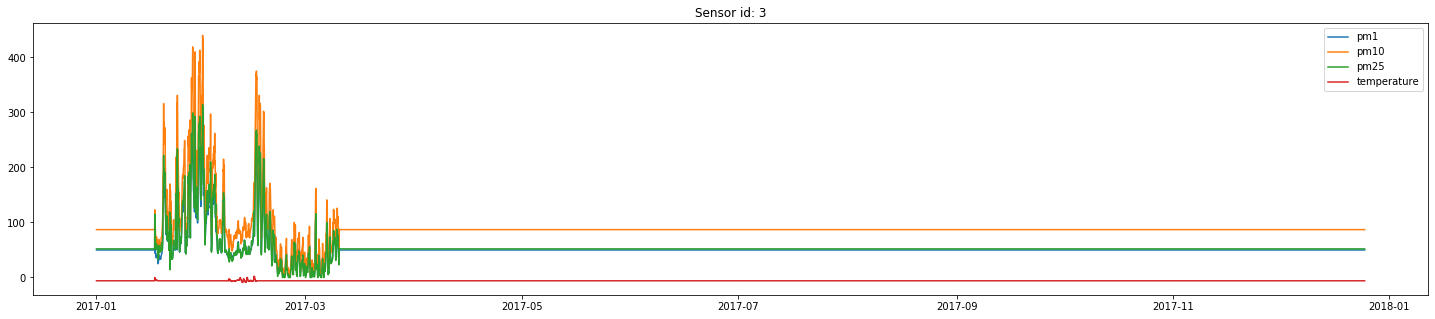

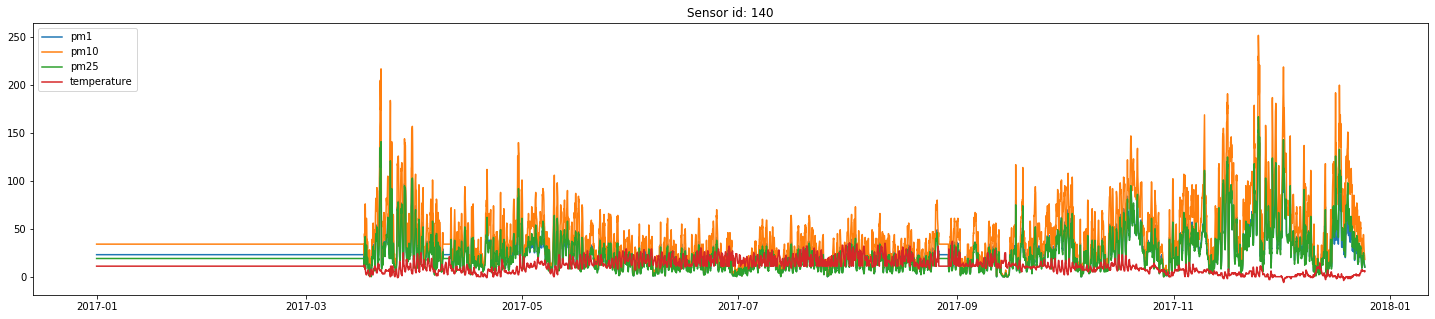

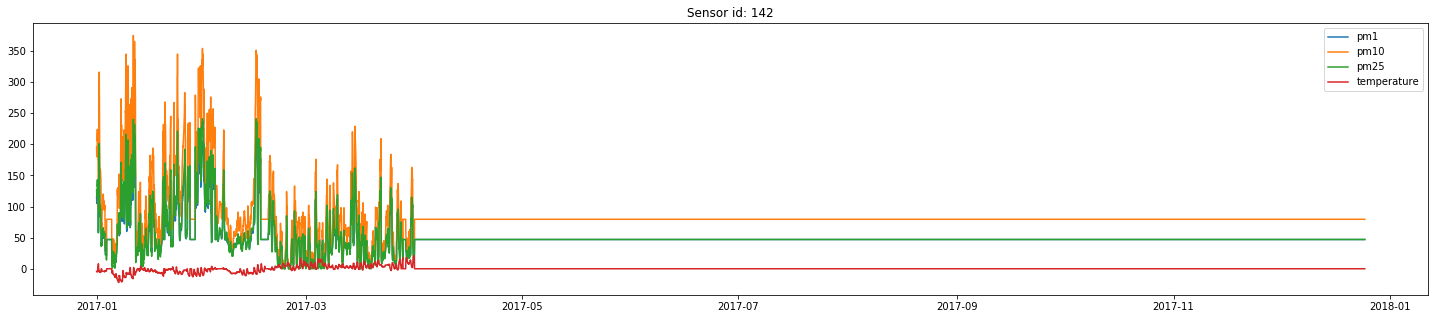

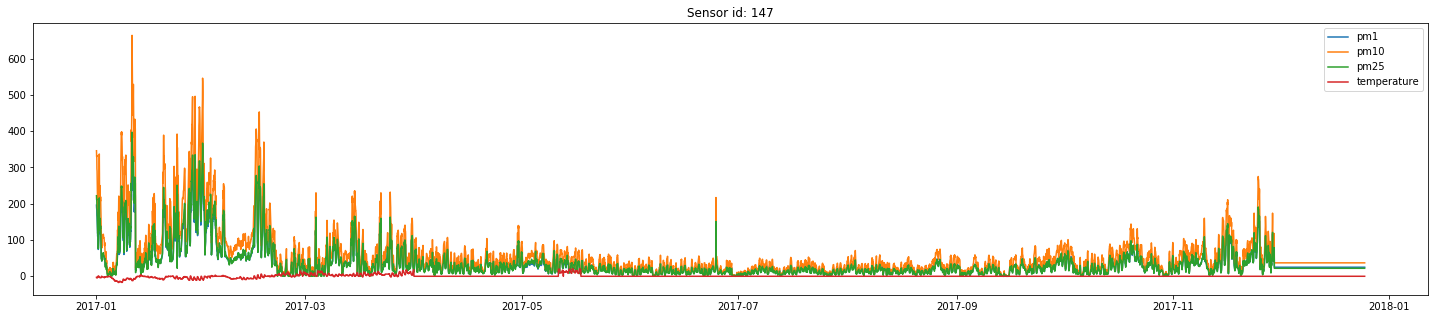

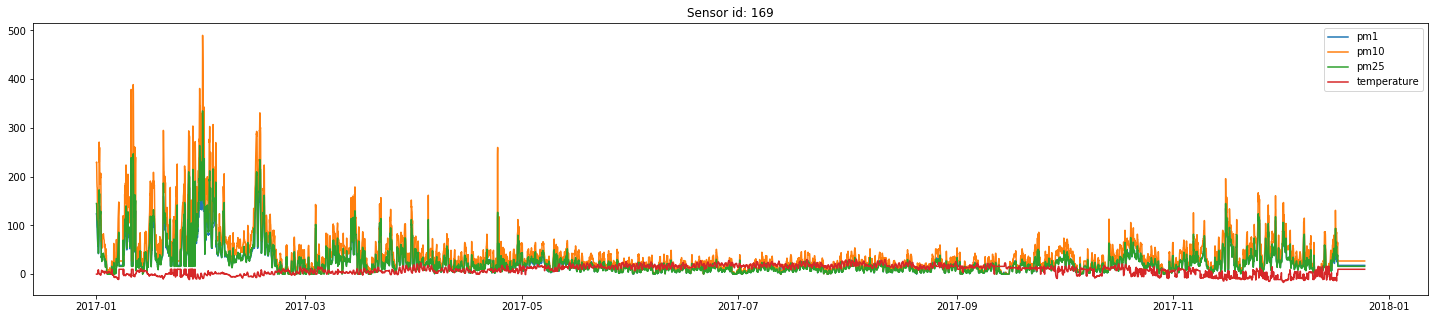

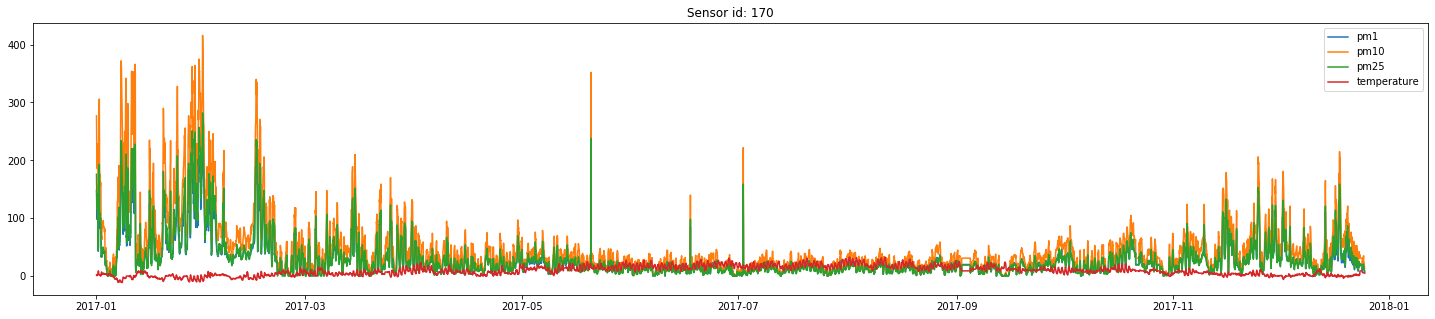

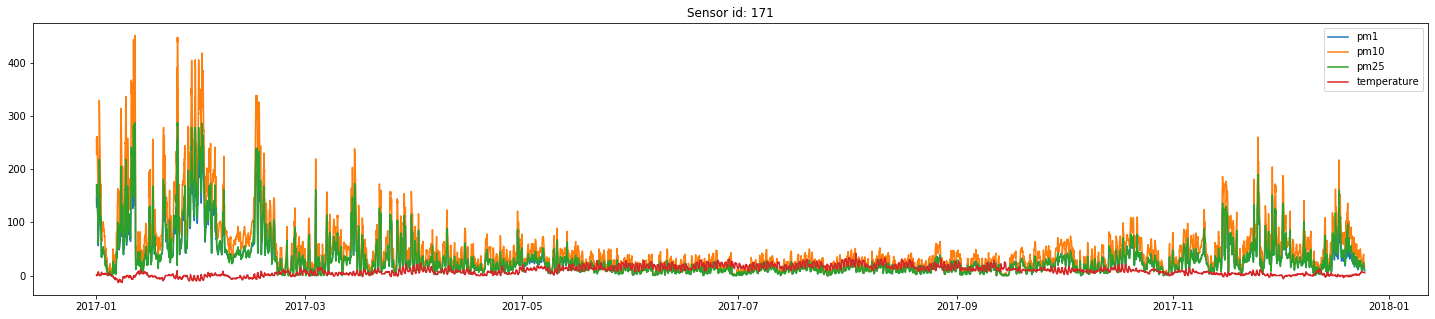

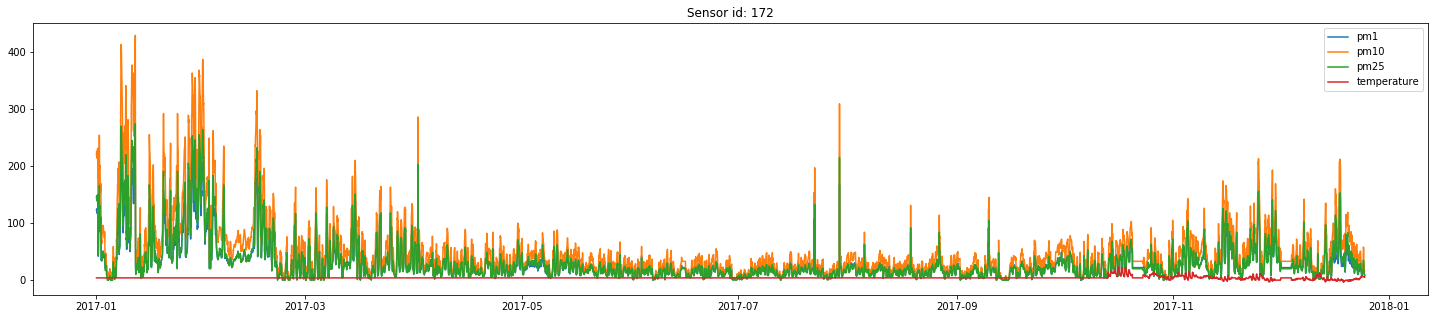

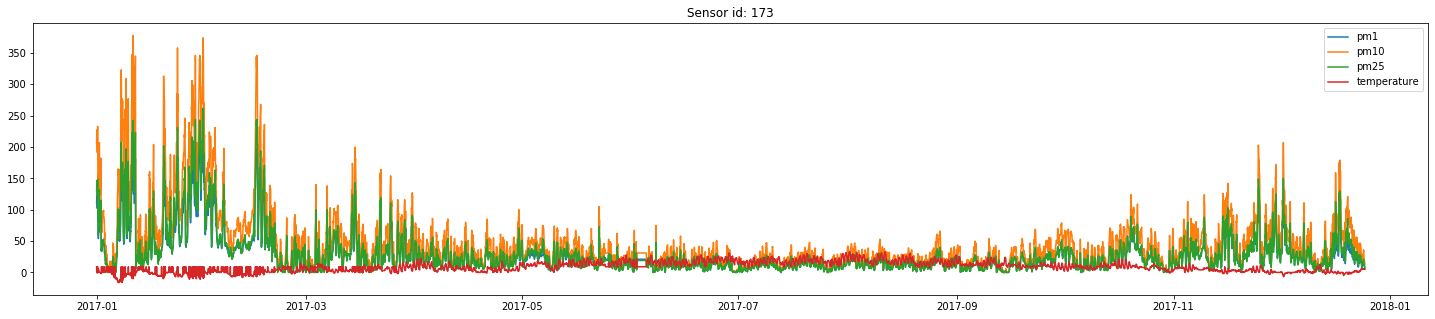

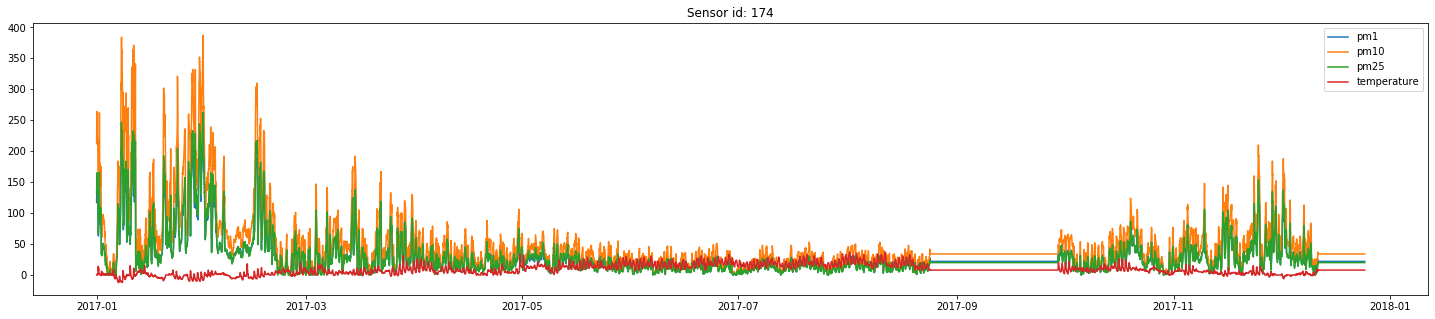

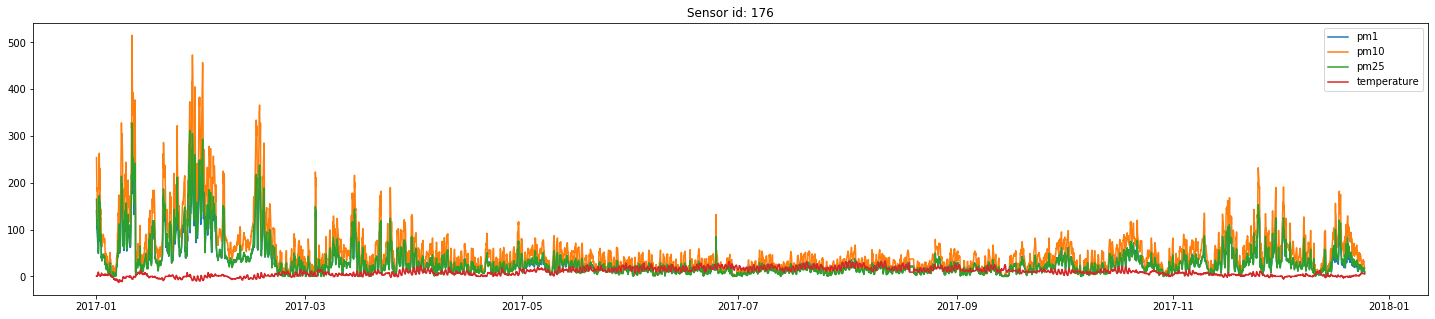

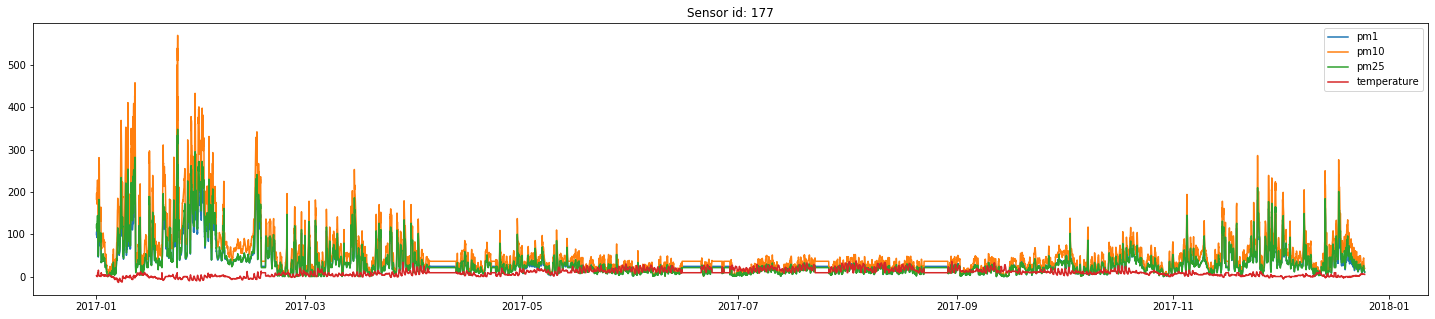

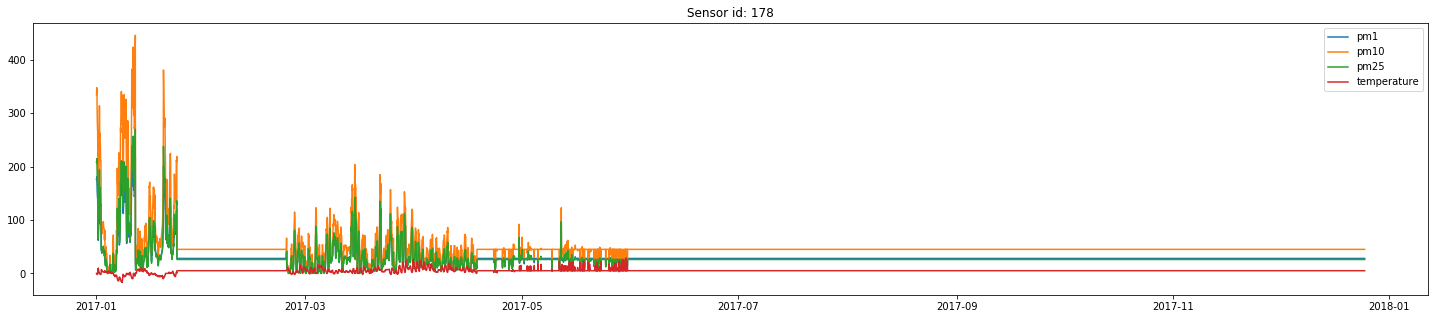

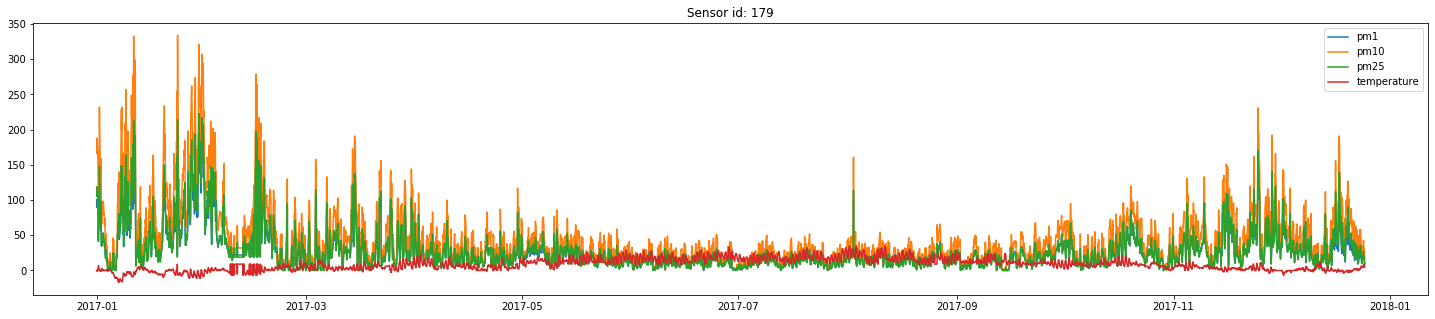

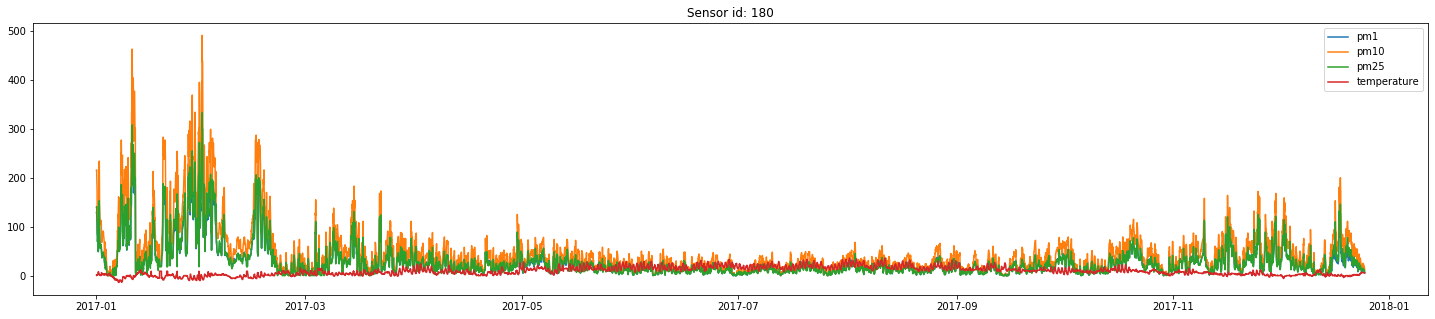

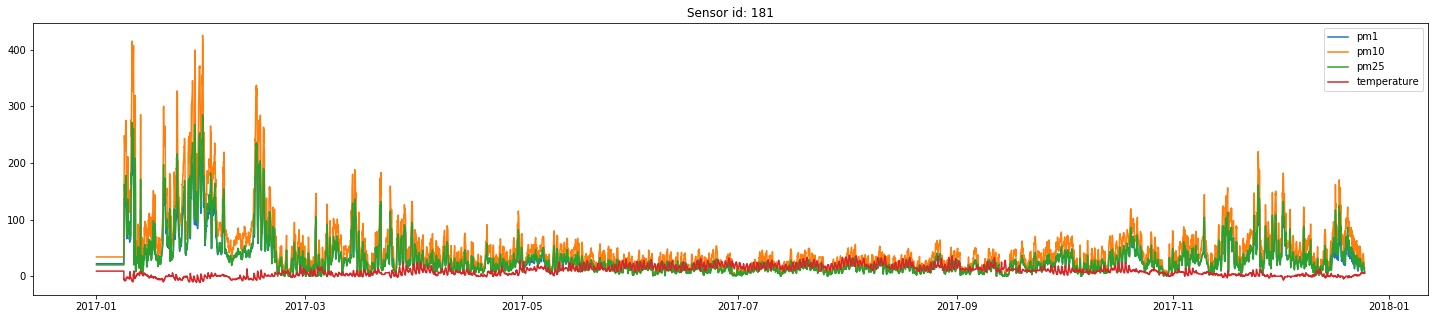

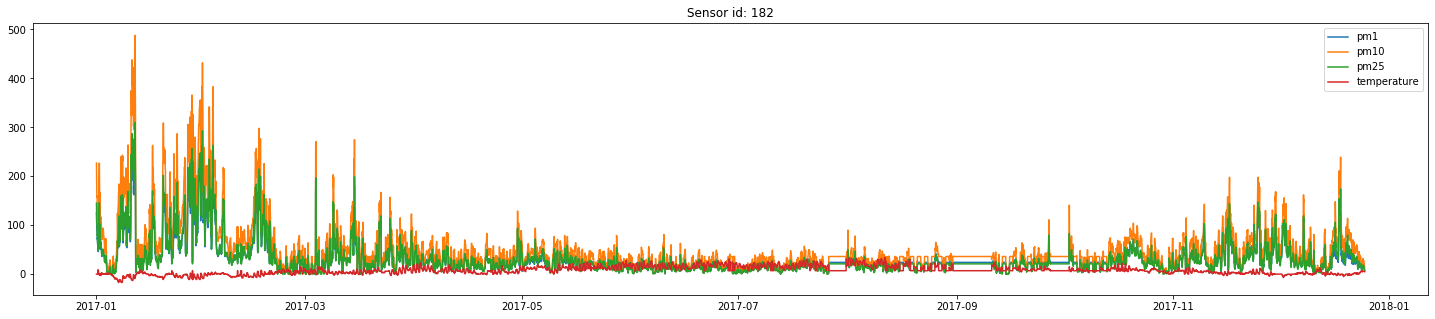

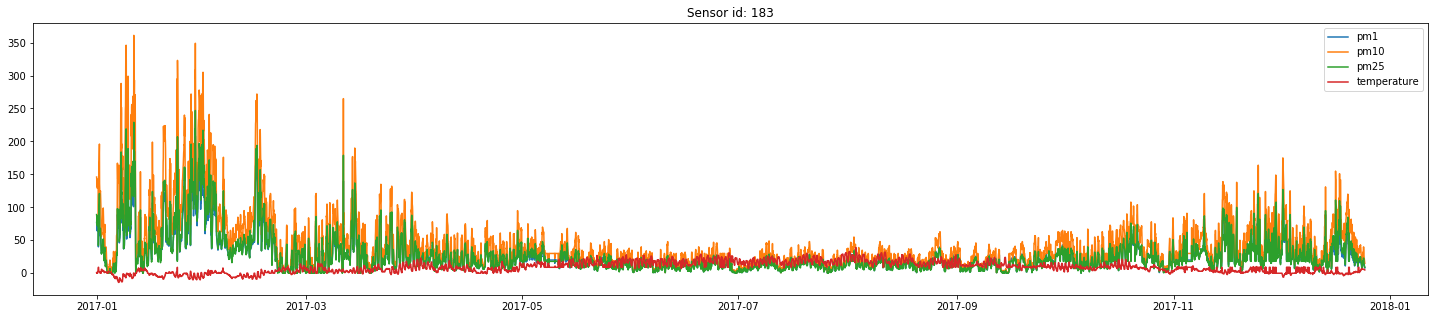

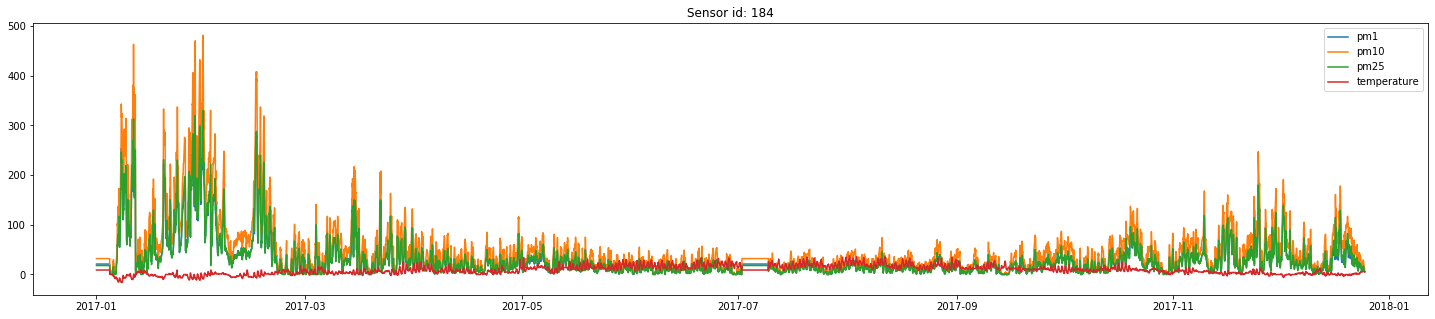

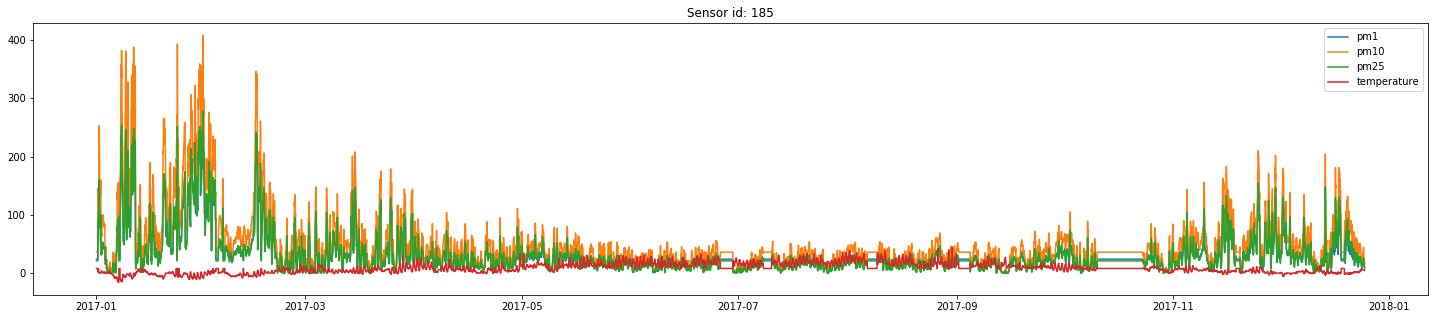

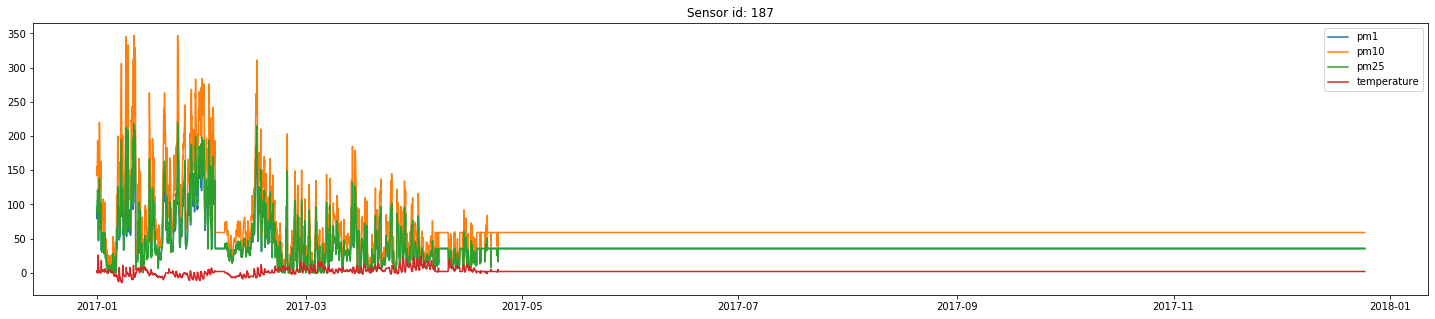

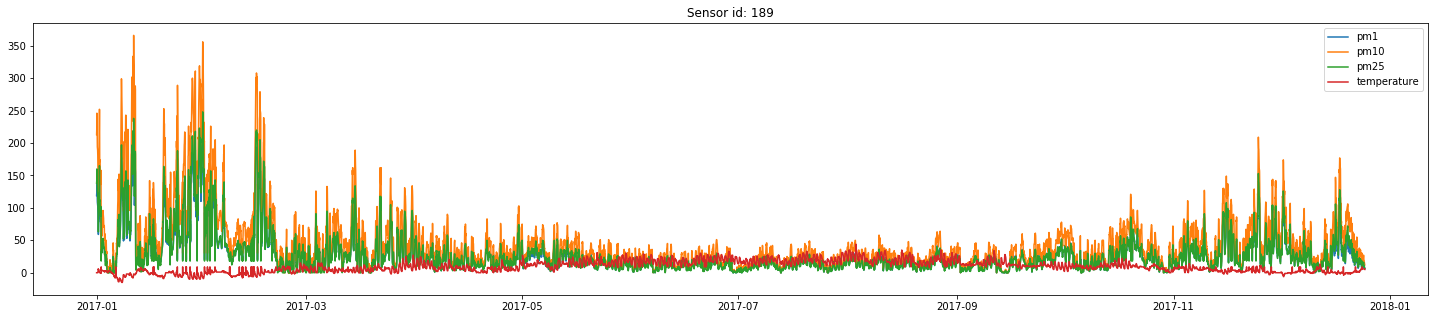

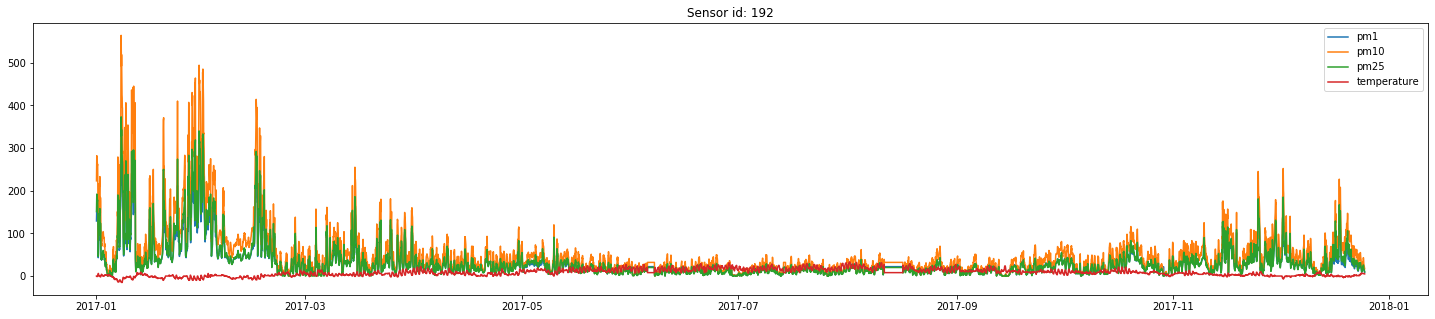

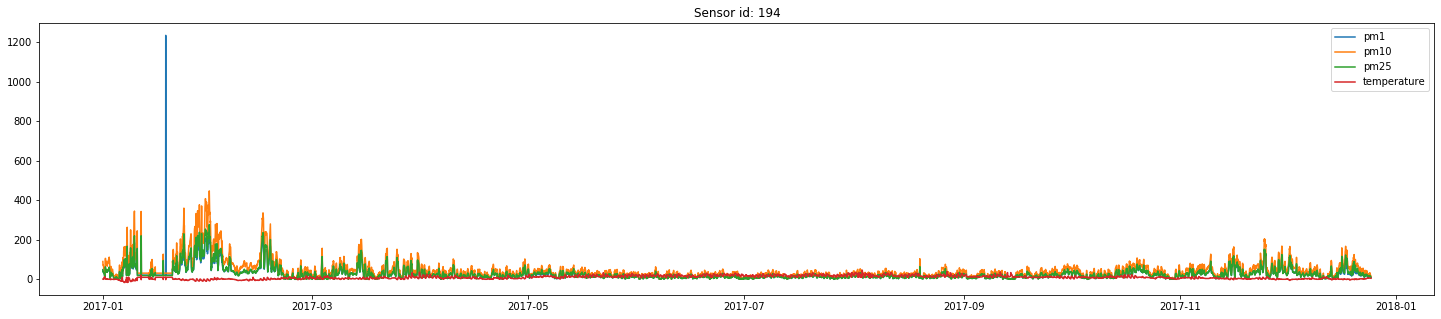

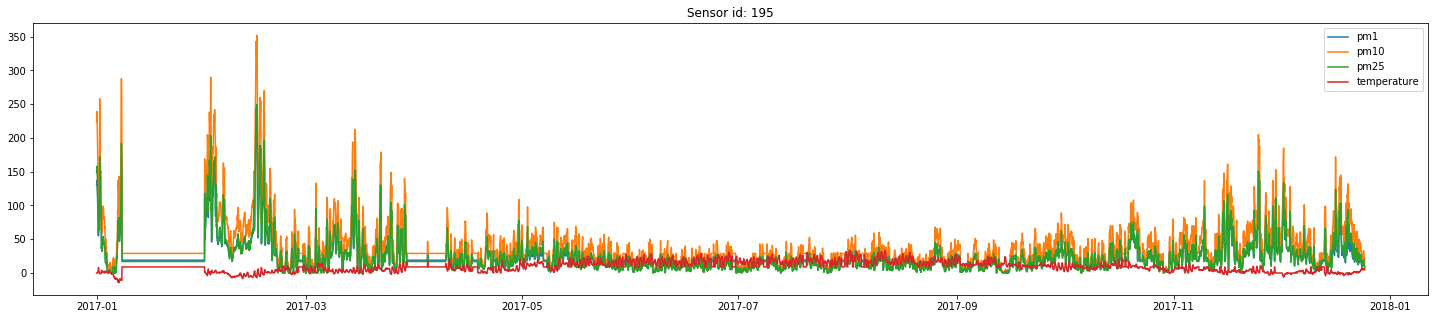

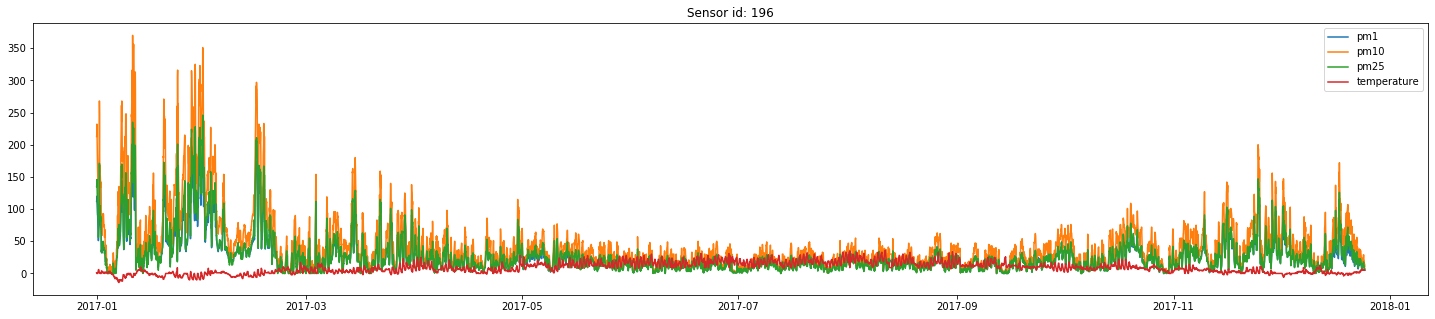

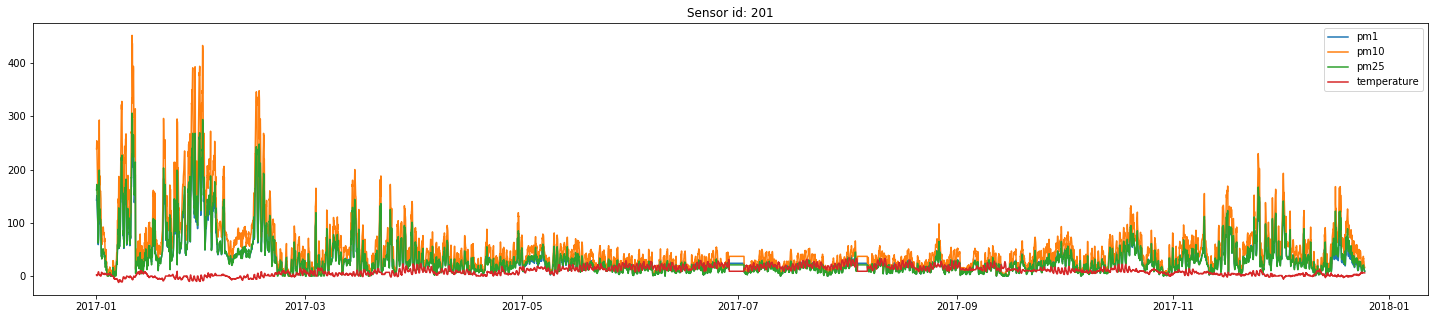

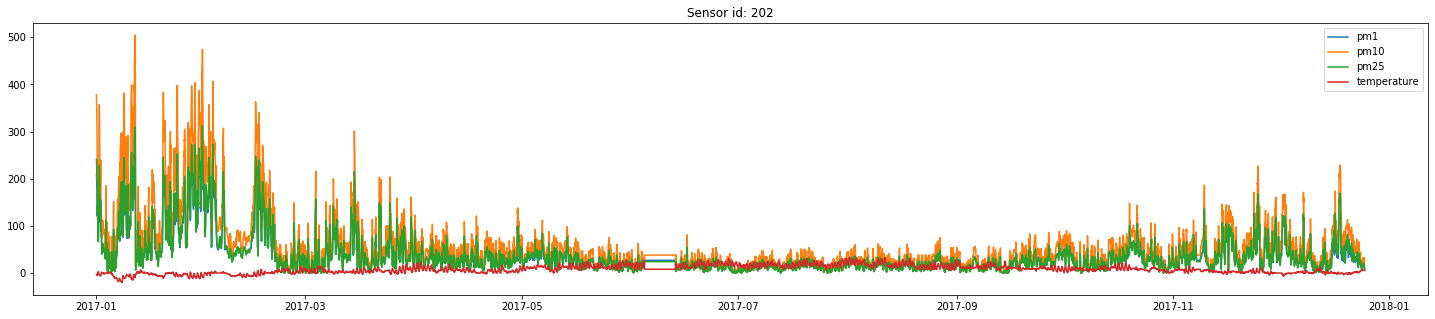

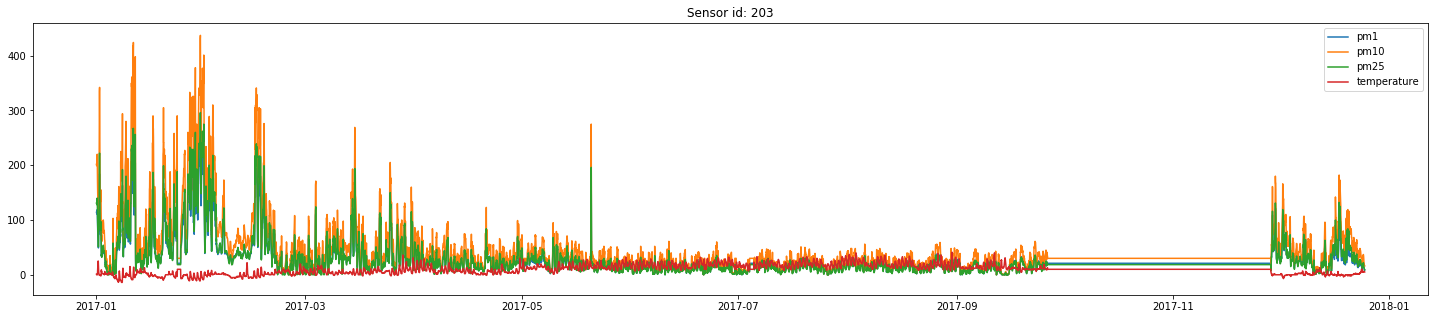

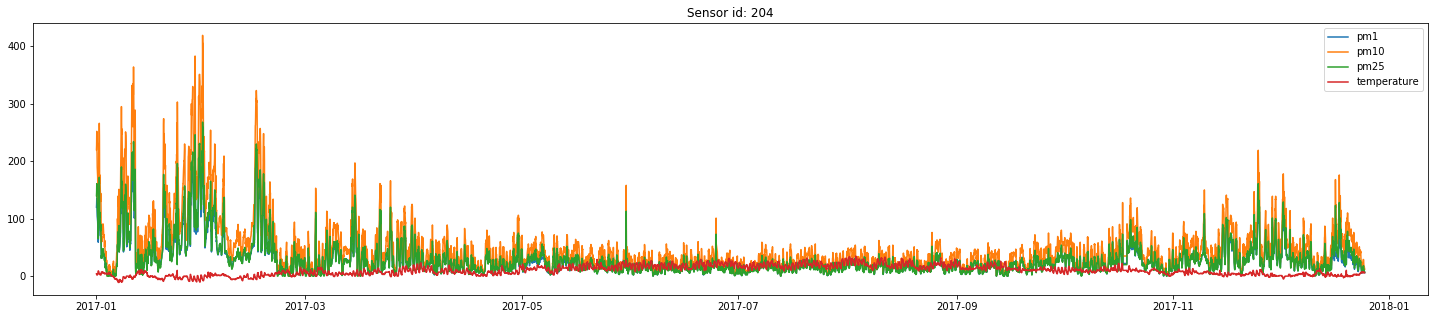

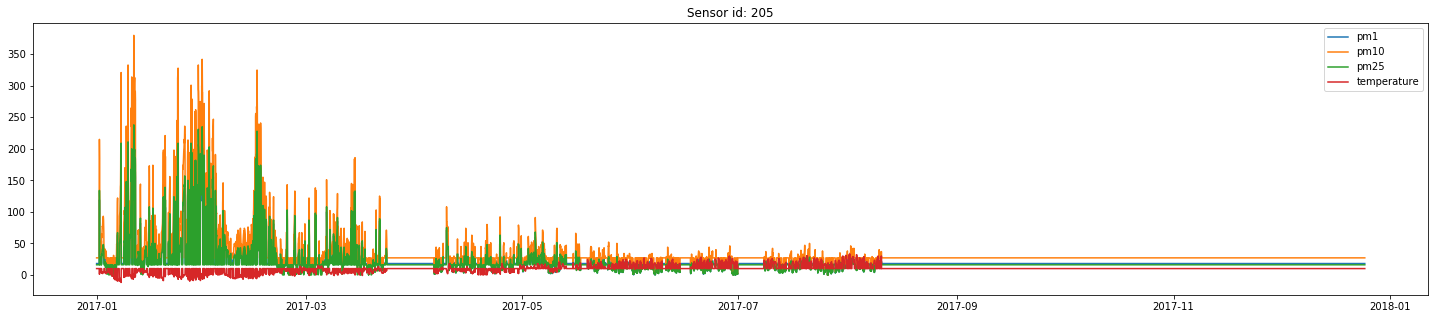

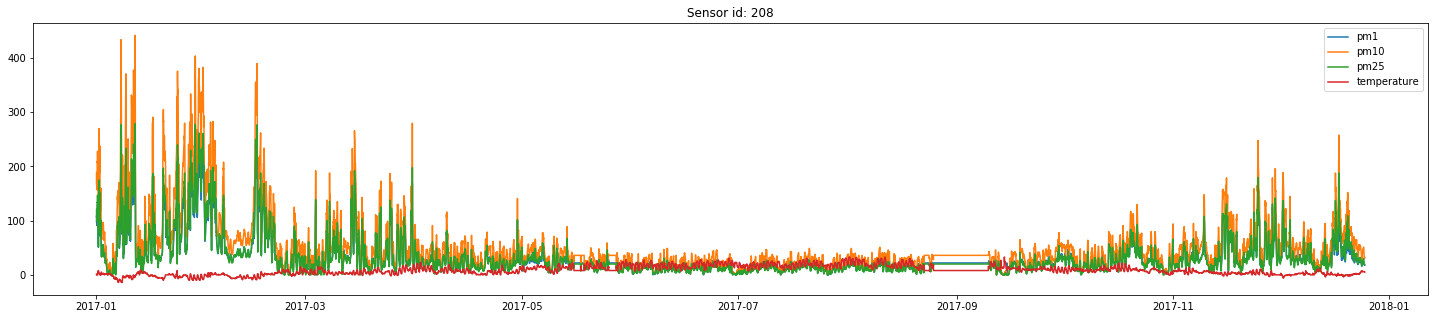

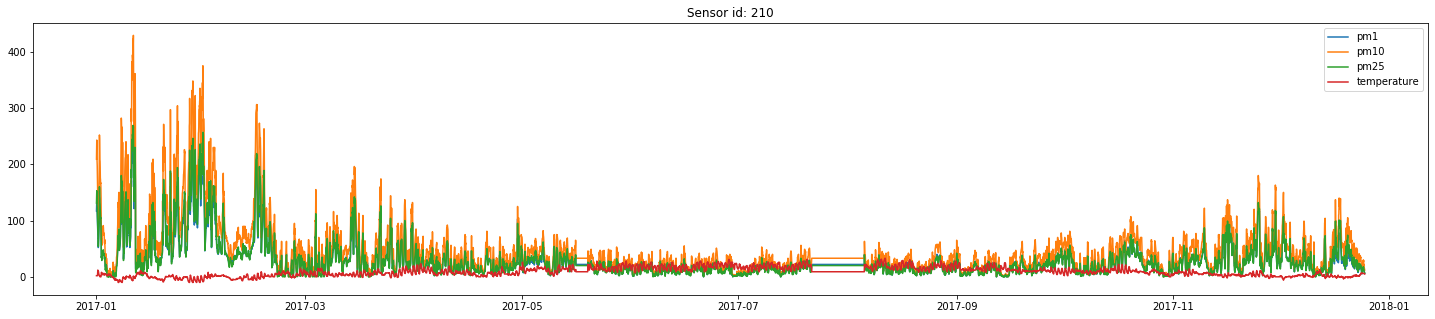

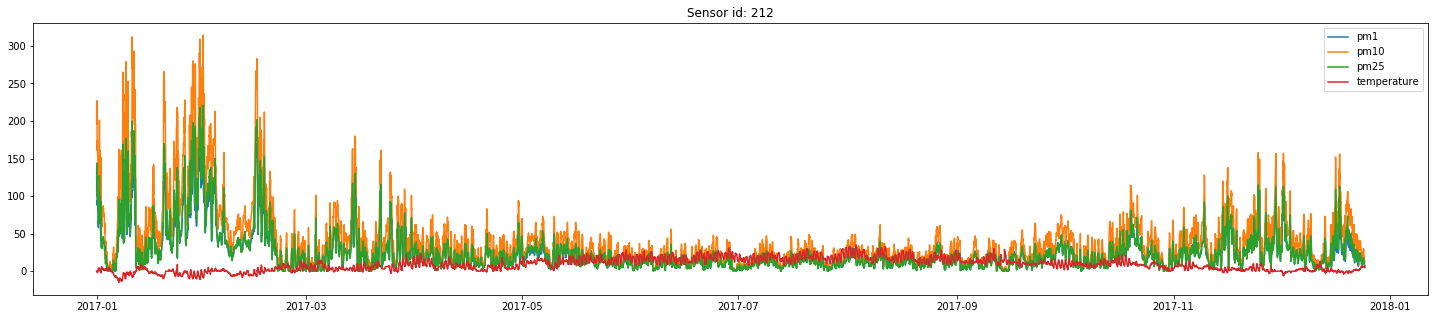

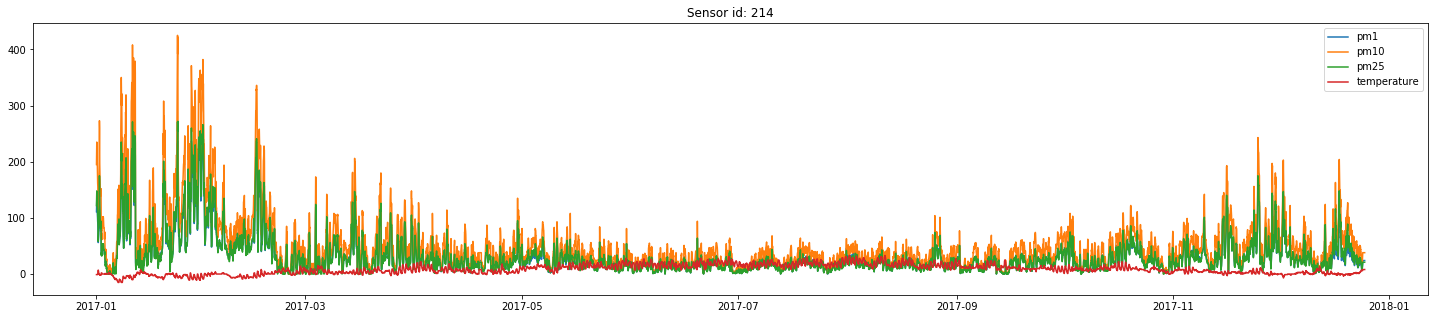

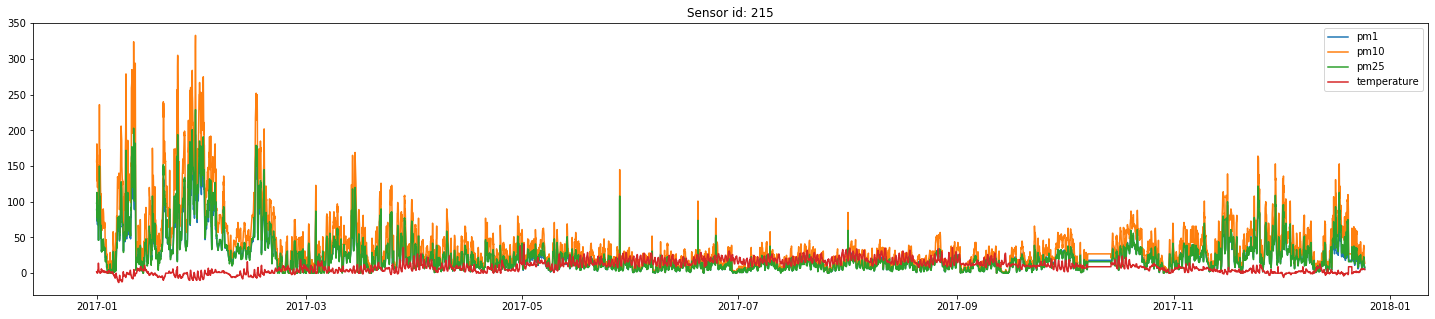

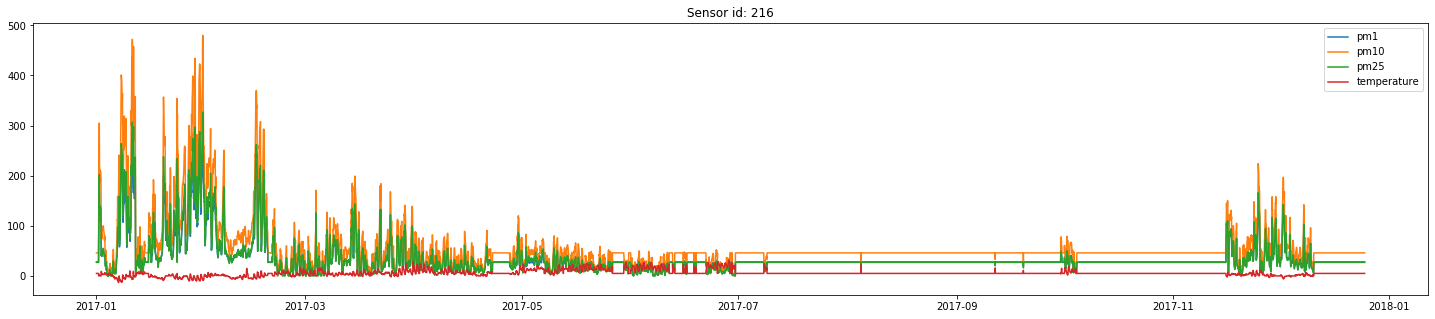

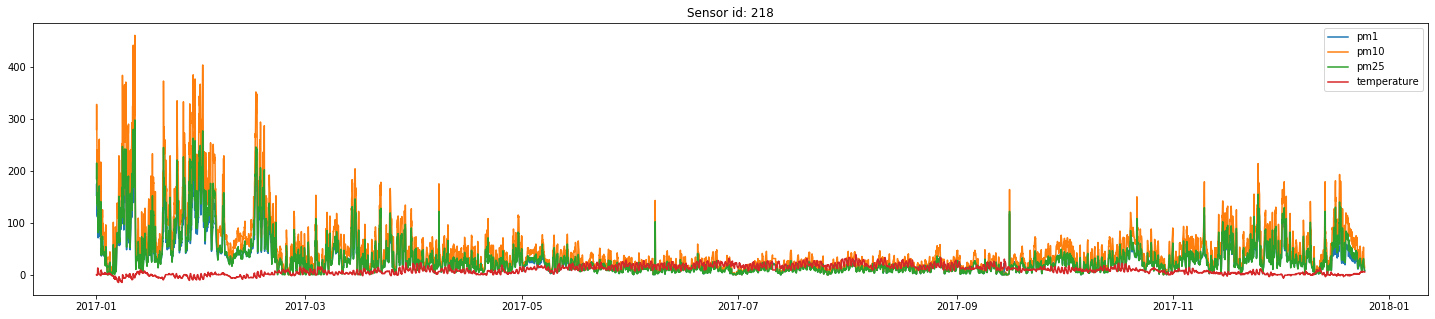

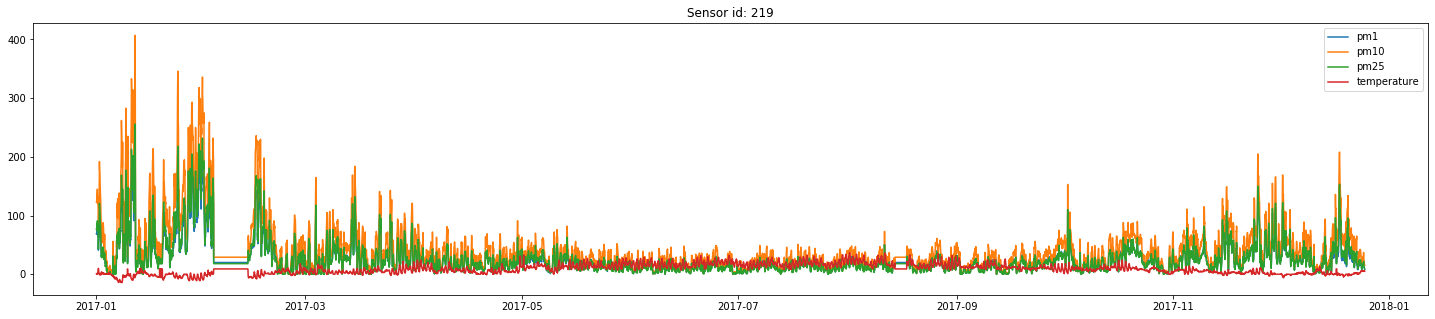

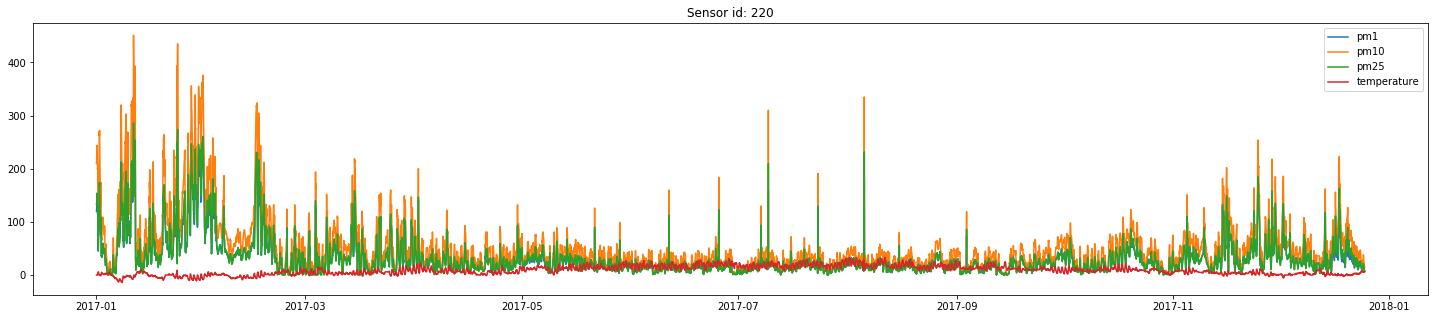

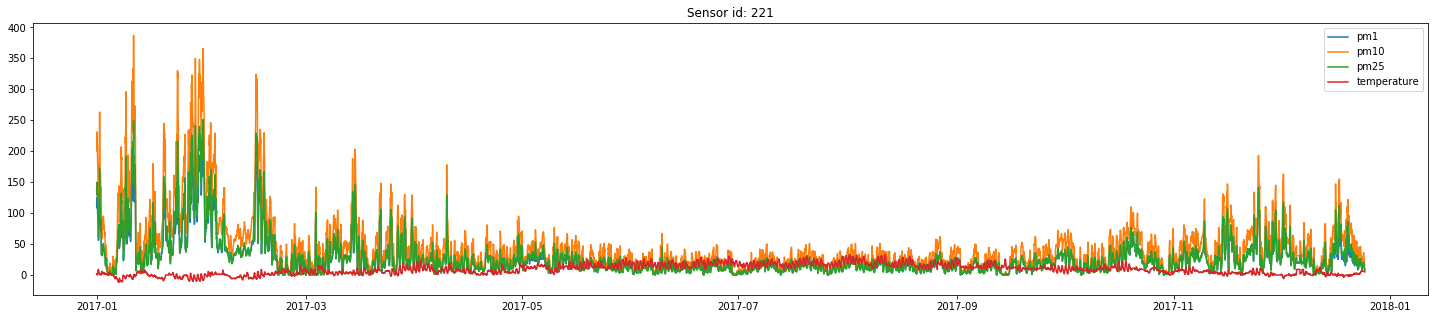

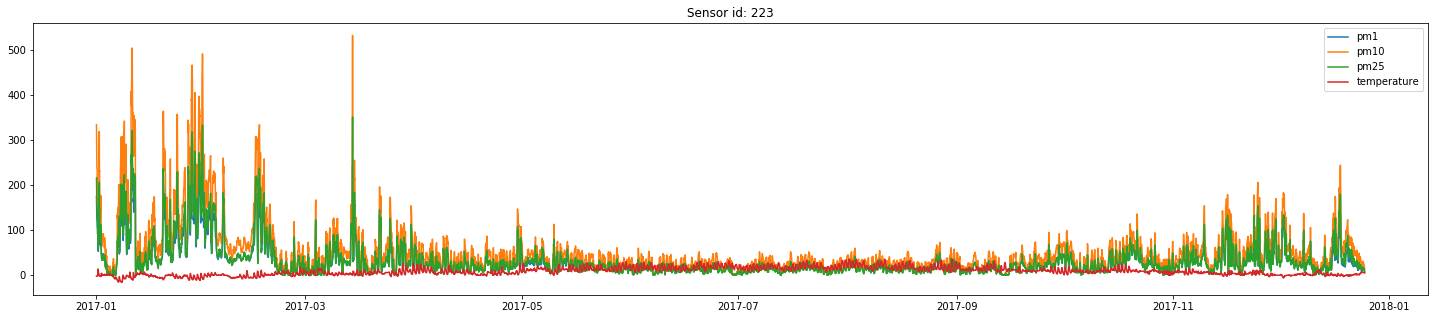

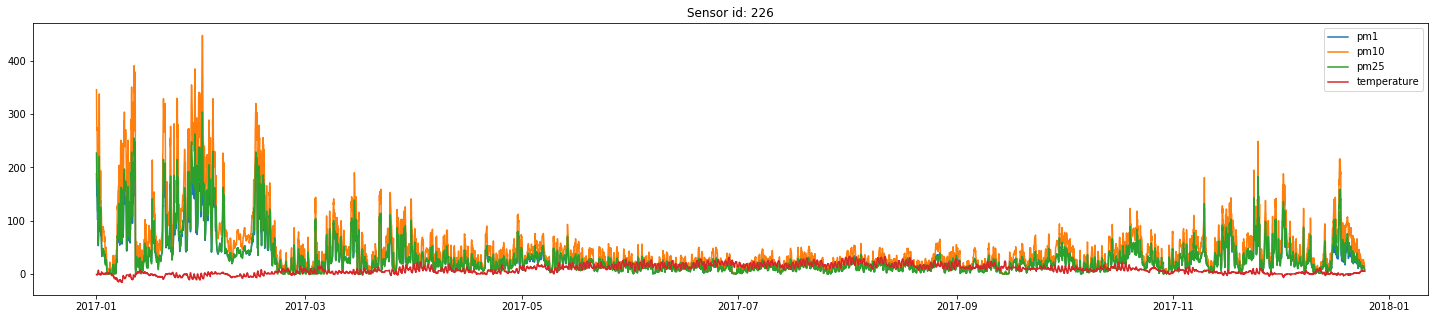

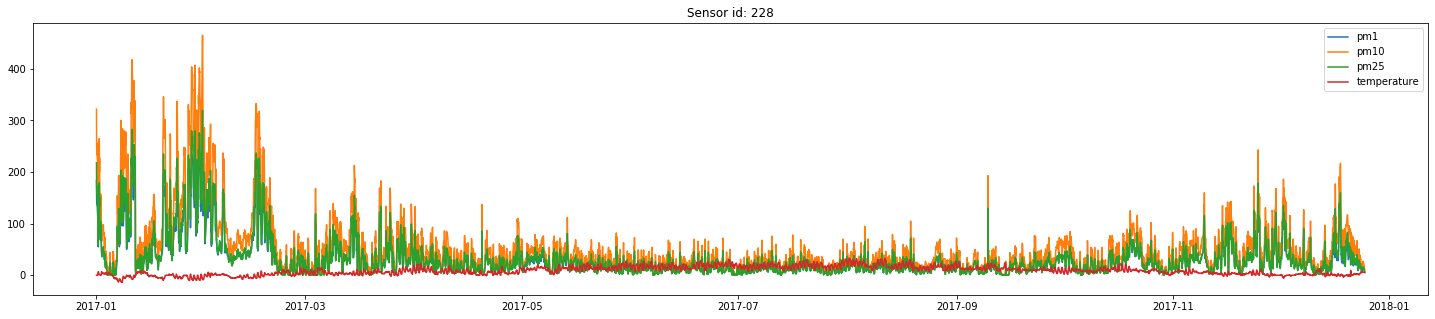

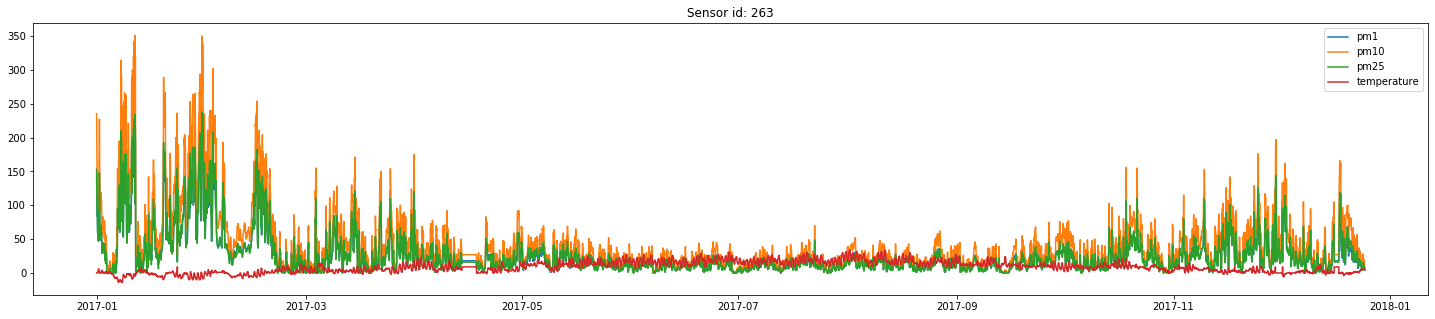

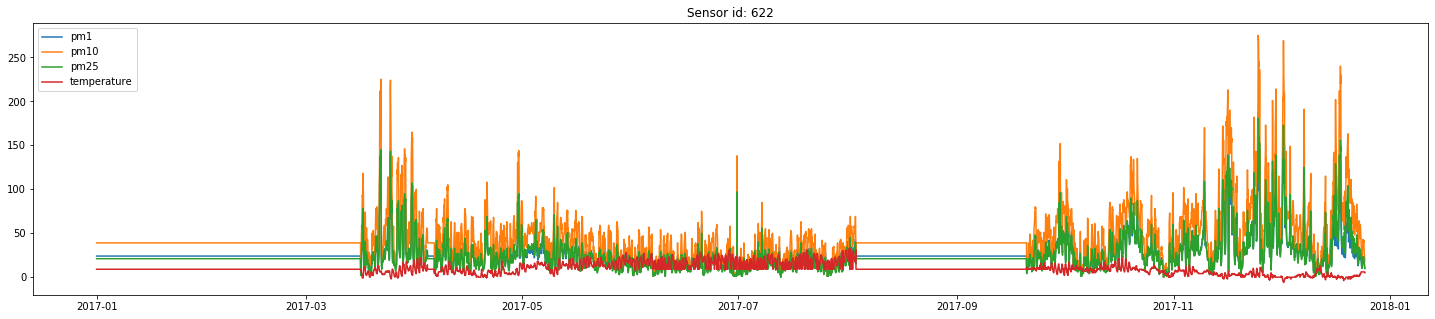

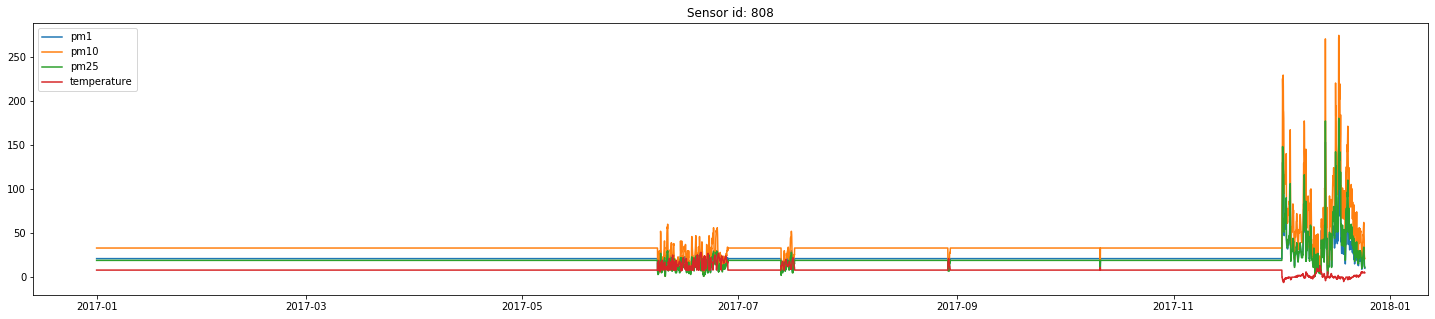

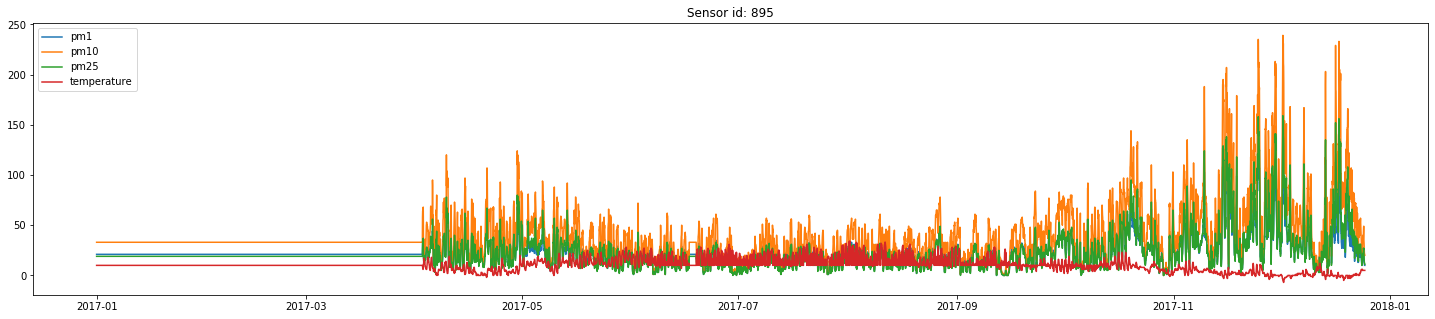

In [16]:
sensor_ids = sensors.id.unique()
for sensor in sensor_ids:
    cols = [column for column in data.columns if column.startswith(str(sensor))]
    plot_data = data[cols + ['UTC time']]
    plt.figure(figsize=(25, 5))
    plt.plot(plot_data['UTC time'], plot_data['{}_pm1'.format(sensor)])
    plt.plot(plot_data['UTC time'], plot_data['{}_pm10'.format(sensor)])
    plt.plot(plot_data['UTC time'], plot_data['{}_pm25'.format(sensor)])
    plt.plot(plot_data['UTC time'], plot_data['{}_temperature'.format(sensor)])
    plt.legend(['pm1', 'pm10', 'pm25', 'temperature']);
    plt.title('Sensor id: {}'.format(sensor))


We wszystkich wykresach widać duży skok na początku i końcu roku. Patrząc na temperatury można zauważyć delikatną odwrotną korelację pomiędzy stężeniem zanieczyszczeń a temperaturą. Wnioskiem, który jako pierwszy nasuwa się na myśl, jest fakt, że są to miesiące, w których zazwyczaj rozpoczyna/kończy się sezon grzewczy.

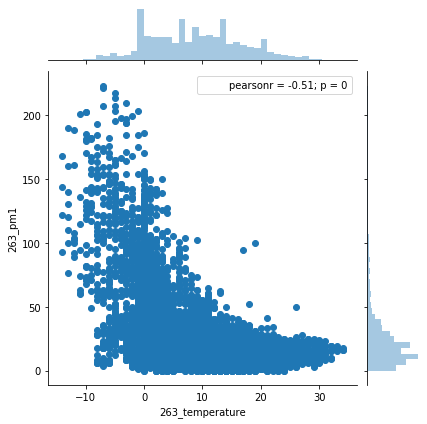

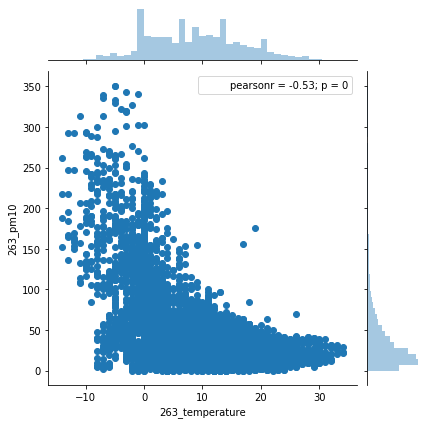

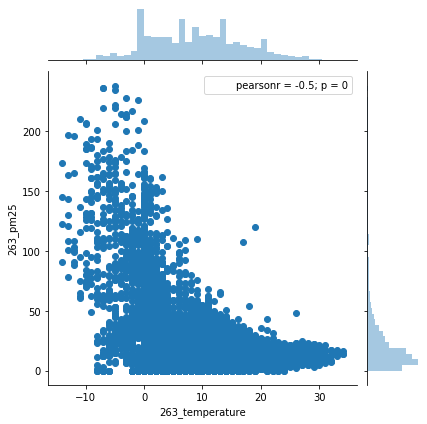

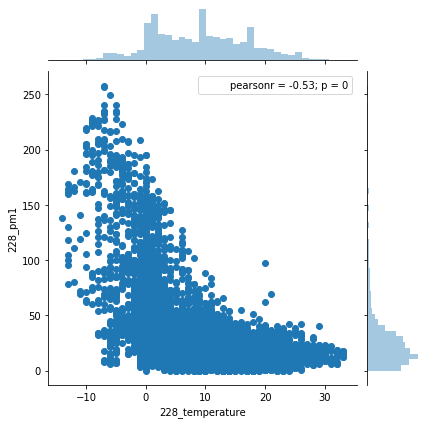

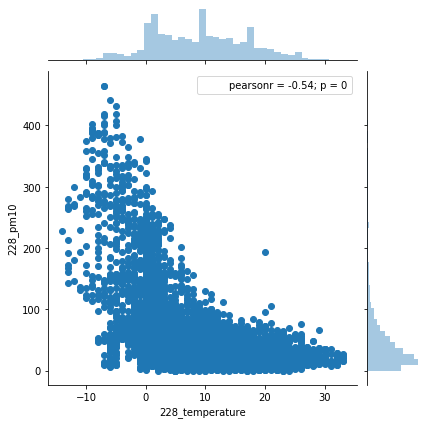

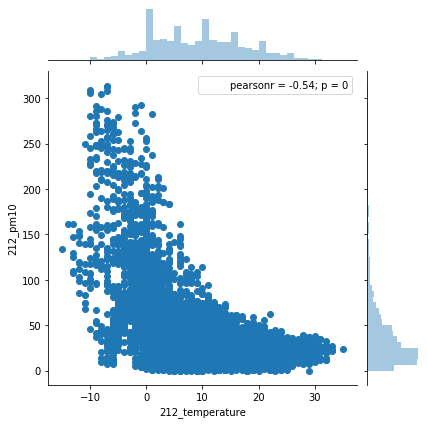

In [18]:
sensor_ids = [263, 228, 212]
for sensor in sensor_ids:
    cols = [column for column in data.columns if column.startswith(str(sensor))]
    plot_data = data[cols]
    joint = sns.jointplot(data=plot_data, x='{}_temperature'.format(str(sensor)), y='{}_pm1'.format(sensor))
    joint.annotate(pearsonr)
    joint = sns.jointplot(data=plot_data, x='{}_temperature'.format(sensor), y='{}_pm10'.format(sensor))
    joint.annotate(pearsonr)
    joint = sns.jointplot(data=plot_data, x='{}_temperature'.format(sensor), y='{}_pm25'.format(sensor))
    joint.annotate(pearsonr)

Patrząc na powyższe wykresy można zauważyć, że występuje słaba korelacja (średnio na poziomie ok -0.5 w skali korelacji Pearsona) pomiędzy stężeniem pyłów a temperaturą.